# Импорты

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghost\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Анализ данных

Аналогично проведём анализ на одной спарсенной категории

In [11]:
df_all = pd.read_csv(f'./../data/processed/reviews/obuvmuzhskayakedy_i_krossovki/all.csv')
df_all.head()

review_rating                                        review_text  \
0              5  До этого покупали в магазине такие же, отходил...   
1              5   Достоинства:Дизайн и качество отменные. Молодцы!   
2              5  Кроссовки очень понравились,теплые,качественно...   
3              4                         Достоинства:Узкие. Возврат   
4              5  Достоинства:Отличное качество, размер соответс...   

                                    review_text_plus review_text_minus  \
0                                                Нет               Нет   
1               Дизайн и качество отменные. Молодцы!               Нет   
2                                                Нет               Нет   
3                                     Узкие. Возврат               Нет   
4  Отличное качество, размер соответствует, легки...               Нет   

                                 review_text_comment  
0  До этого покупали в магазине такие же, отходил...  
1                                                Нет  
2  Кроссовки очень понравились,теплые,качественно...  
3                                                Нет  
4                                                Нет

Отделим данные по оценке

In [16]:
df_rating_1 = df_all[df_all['review_rating'] == 1]
df_rating_2 = df_all[df_all['review_rating'] == 2]
df_rating_3 = df_all[df_all['review_rating'] == 3]
df_rating_4 = df_all[df_all['review_rating'] == 4]
df_rating_5 = df_all[df_all['review_rating'] == 5]
dfs_ratings = [df_rating_1, df_rating_2, df_rating_3, df_rating_4, df_rating_5]

Посмотрим сколько данных получилось в каждой таблице

In [15]:
print(f'df_rating_1 = {df_rating_1.shape}')
print(f'df_rating_2 = {df_rating_2.shape}')
print(f'df_rating_3 = {df_rating_3.shape}')
print(f'df_rating_4 = {df_rating_4.shape}')
print(f'df_rating_5 = {df_rating_5.shape}')

df_rating_1 = (1620, 5)
df_rating_2 = (695, 5)
df_rating_3 = (1225, 5)
df_rating_4 = (2495, 5)
df_rating_5 = (17115, 5)


Отобразим облака слов, чтобы понимать, на что стоит обратить внимание и что конкретно влияет на определённую оценку.

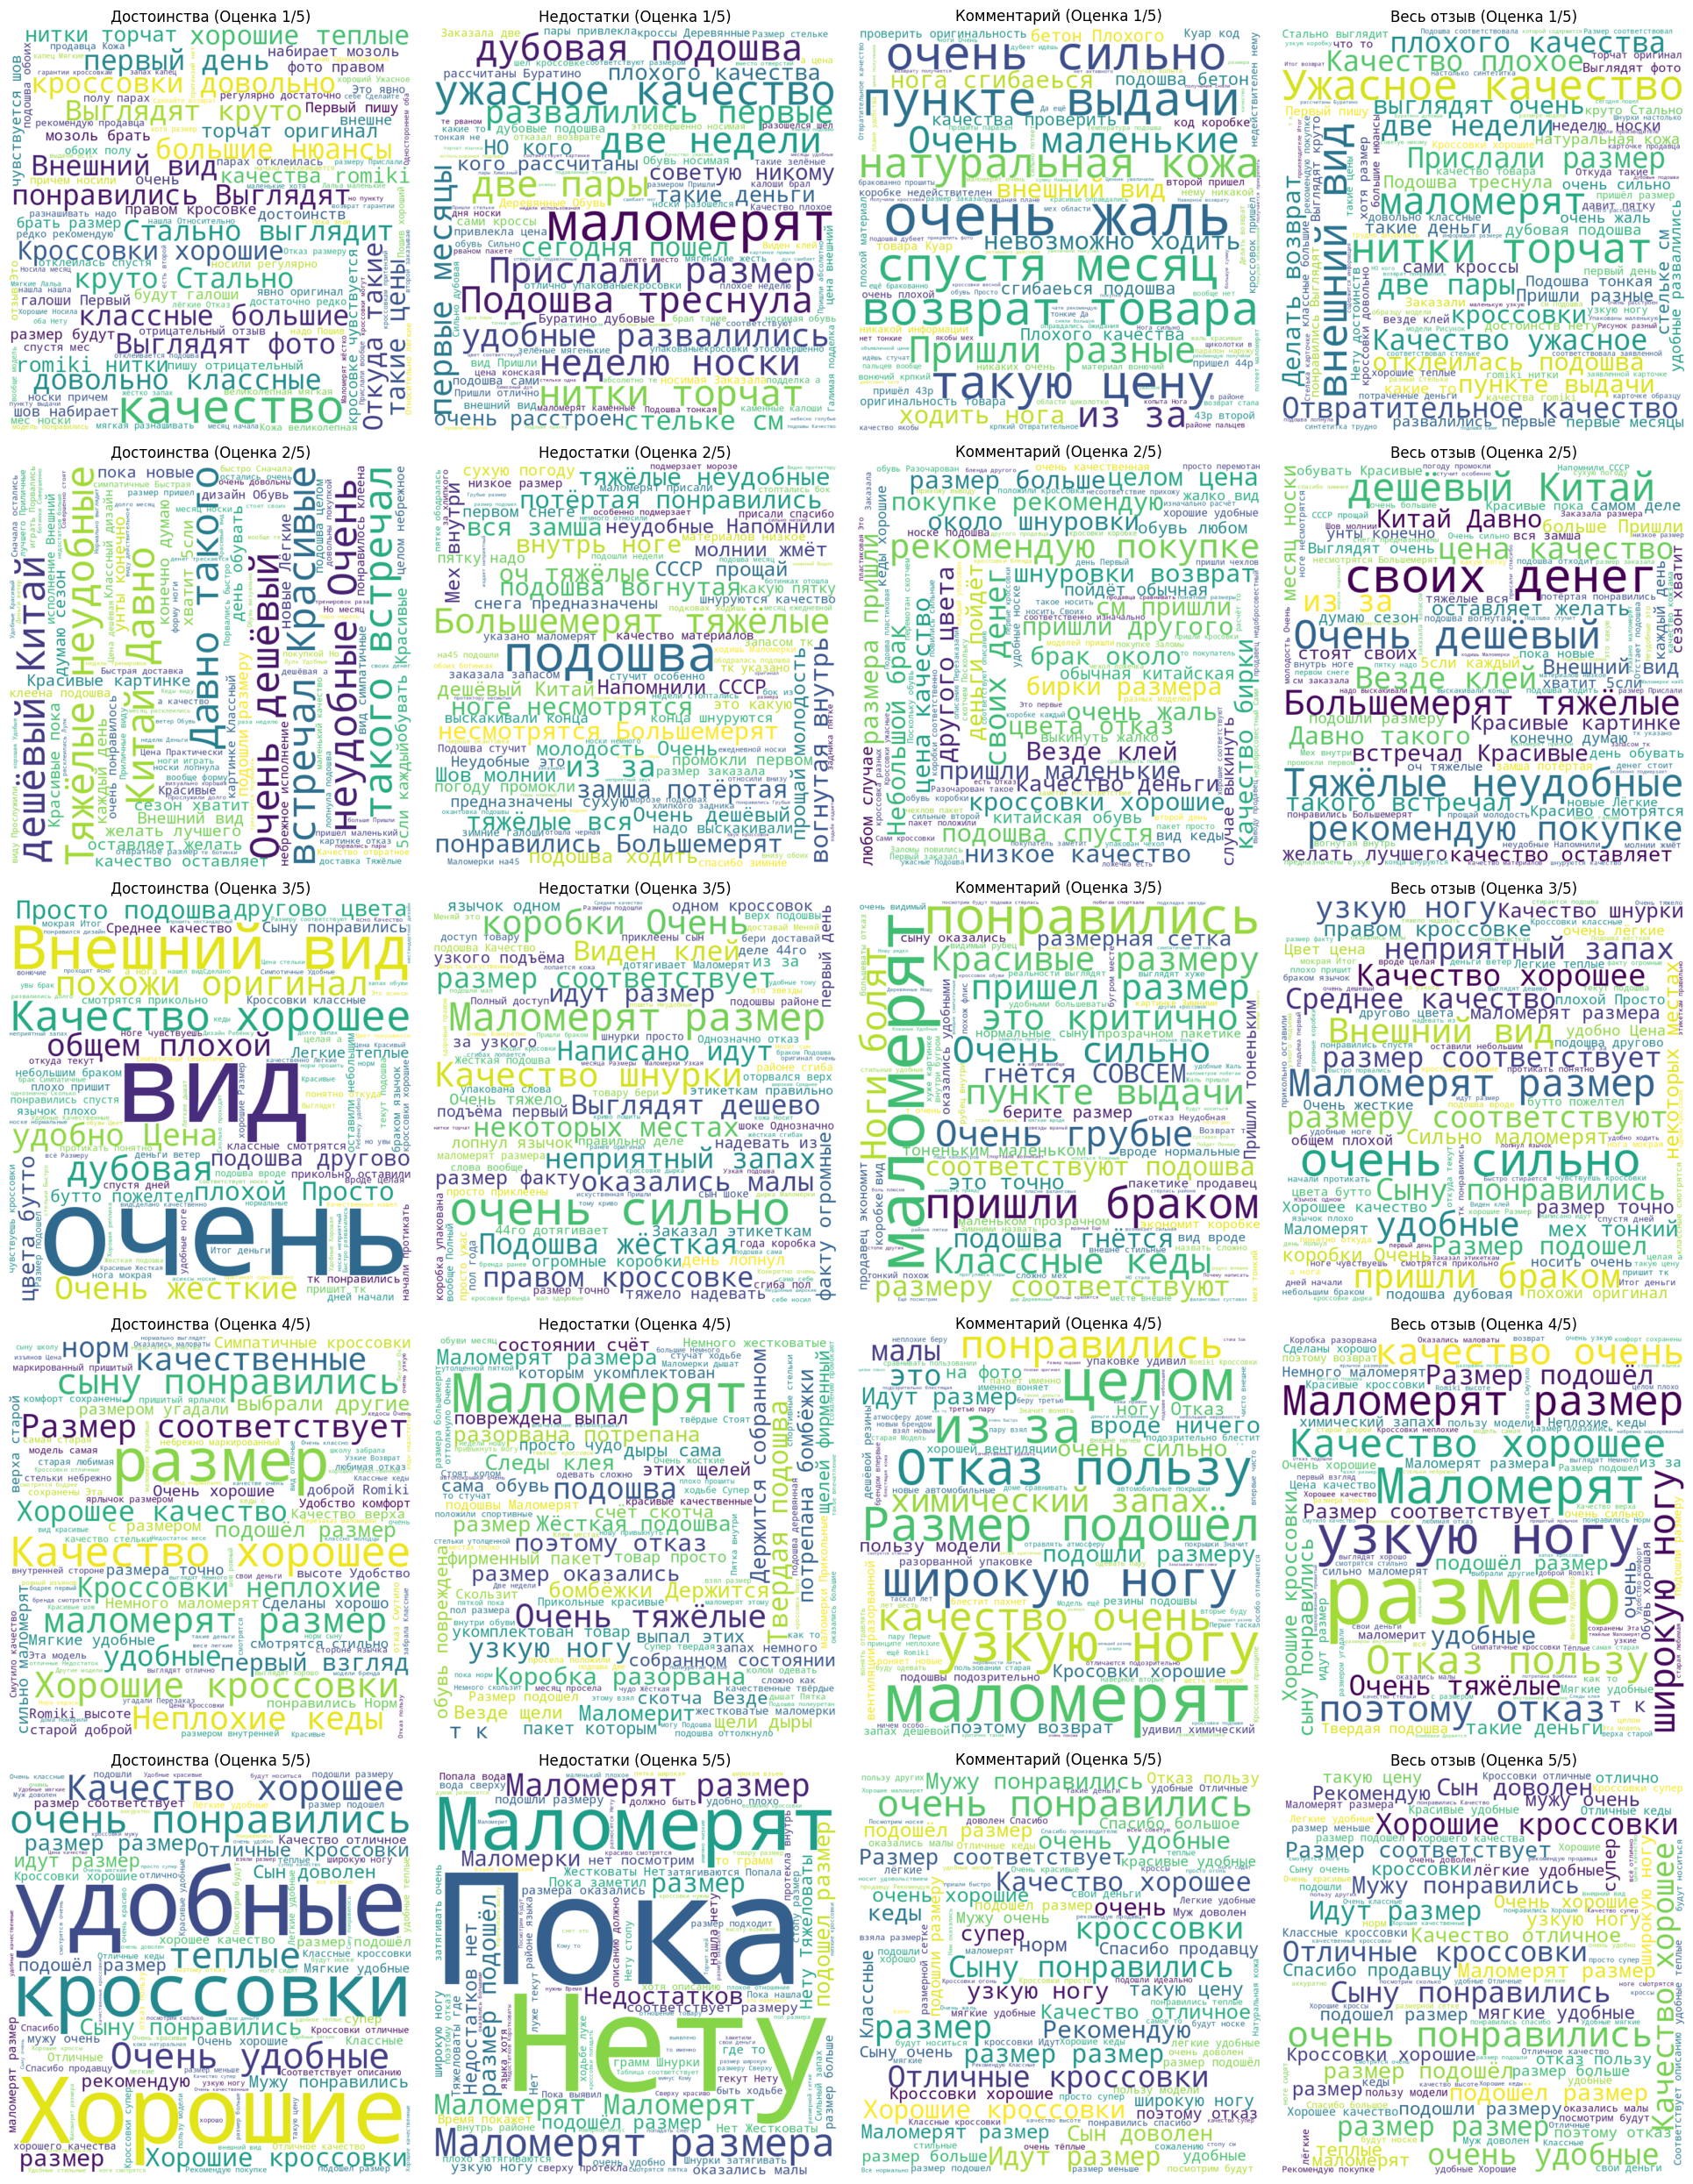

In [30]:
# Загружаем стоп-слова
stop_words = set(stopwords.words('russian'))  # Используем стоп-слова на русском, если ваш текст на русском

# Функция для удаления стоп-слов
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Функция для генерации облака слов с ограничением по количеству слов и размерам
def generate_wordcloud(text, width=800, height=800, max_words=100):
    return WordCloud(width=width, height=height, background_color='white', max_words=max_words).generate(text)

# Настройка размера для сетки изображений
fig, axes = plt.subplots(len(dfs_ratings), 4, figsize=(20, len(dfs_ratings)*5))

# Перебор датафреймов и столбцов
for i, df in enumerate(dfs_ratings):
    texts = [
        ' '.join(df['review_text_plus'].dropna()),  # review_text_plus
        ' '.join(df['review_text_minus'].dropna()),  # review_text_minus
        ' '.join(df['review_text_comment'].dropna()),  # review_text_comment
        ' '.join(df['review_text_plus'].dropna()) + ' ' + ' '.join(df['review_text_minus'].dropna()) + ' ' + ' '.join(df['review_text_comment'].dropna())  # Все вместе
    ]
    
    # Удаляем стоп-слова из текстов
    cleaned_texts = [remove_stopwords(text) for text in texts]
    
    titles = ['Достоинства', 'Недостатки', 'Комментарий', 'Весь отзыв']
    
    for j, cleaned_text in enumerate(cleaned_texts):
        wordcloud = generate_wordcloud(cleaned_text)
        axes[i, j].imshow(wordcloud, interpolation='bilinear')
        axes[i, j].axis('off')
        axes[i, j].set_title(f'{titles[j]} (Оценка {i+1}/5)')

# Уменьшаем пространство между графиками
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# Отображение облаков слов
plt.tight_layout()
plt.show()

Перенесём облака слов в таблицы, которые можно будет использовать в будущем для вычленения статистики по топ-5 каким-либо параметрам

In [33]:
# Загружаем стоп-слова
stop_words = set(stopwords.words('russian'))  # Используем стоп-слова на русском, если ваш текст на русском

# Функция для удаления стоп-слов
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Функция для генерации облака слов с ограничением по количеству слов и размерам
def generate_wordcloud(text, width=800, height=400, max_words=100):
    return WordCloud(width=width, height=height, background_color='white', max_words=max_words).generate(text)

# Список для хранения всех датафреймов
all_word_dfs = []

# Перебор датафреймов и столбцов
for i, df in enumerate(dfs_ratings):
    texts = [
        ' '.join(df['review_text_plus'].dropna()),  # review_text_plus
        ' '.join(df['review_text_minus'].dropna()),  # review_text_minus
        ' '.join(df['review_text_comment'].dropna()),  # review_text_comment
        ' '.join(df['review_text_plus'].dropna()) + ' ' + ' '.join(df['review_text_minus'].dropna()) + ' ' + ' '.join(df['review_text_comment'].dropna())  # Все вместе
    ]
    
    # Удаляем стоп-слова из текстов
    cleaned_texts = [remove_stopwords(text) for text in texts]
    
    titles = ['Review Text Plus', 'Review Text Minus', 'Review Text Comment', 'All Combined']
    
    # Обработка каждого столбца
    for j, cleaned_text in enumerate(cleaned_texts):
        wordcloud = generate_wordcloud(cleaned_text)
        
        # Получаем частоты слов из облака
        word_frequencies = wordcloud.words_  # Словарь {слово: частота}
        
        # Преобразуем в DataFrame
        word_data = pd.DataFrame(word_frequencies.items(), columns=['word', 'frequency'])
        
        # Добавляем информацию о текущем датафрейме и столбце
        word_data['df_index'] = f'df{i+1}'
        word_data['column'] = titles[j]
        
        # Добавляем в общий список
        all_word_dfs.append(word_data)

# Объединяем все датафреймы в один
final_df = pd.concat(all_word_dfs, ignore_index=True)

# Выводим итоговый датафрейм
final_df

word  frequency df_index            column
0                 качество   1.000000      df1  Review Text Plus
1     понравились Выглядят   0.200000      df1  Review Text Plus
2            Выглядят фото   0.200000      df1  Review Text Plus
3           Выглядят круто   0.200000      df1  Review Text Plus
4            круто Стально   0.200000      df1  Review Text Plus
...                    ...        ...      ...               ...
1995        Качество супер   0.110236      df5      All Combined
1996        смотрятся ноге   0.110236      df5      All Combined
1997        размер подошли   0.110236      df5      All Combined
1998   рекомендую продавца   0.110236      df5      All Combined
1999                легкие   0.102362      df5      All Combined

[2000 rows x 4 columns]